In [58]:
# Libraries
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from imutils import paths
import matplotlib.pyplot as plt
import argparse
import random
import pickle
import cv2
import os
import csv
import numpy as np


In [74]:
def label_dataset(p_type, csv_path):
    labels = []
    line_count = 0
    pokemon_list = read_csv(csv_path)
    
    for row in pokemon_list[1:]:
        if p_type in row:
            labels.append(1)
        else:
            labels.append(0)
        #print(f'\t{row["Name"]} \t {row["Type1"]} \t {row["Type2"]}')
        #print(labels[line_count])
        line_count += 1   
        
    print(f'Processed {line_count} lines.')
    
    train_labels = np.array(labels)
    
    return train_labels

def read_csv(path):
    with open(path, mode='r') as csv_file:
        csv_reader = csv.reader(csv_file)
        sortedlist = sorted(csv_reader, key=lambda row: row[0], reverse=False)
    return sortedlist

def load_images(path, IMAGE_DIMS):
    data = []
    imagePaths = sorted(list(paths.list_images(path)))
    #print(imagePaths)
    
    for imagePath in imagePaths:
        # load the image, pre-process it, and store it in the data list
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (IMAGE_DIMS[1], IMAGE_DIMS[0]))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = img_to_array(image)
        data.append(image)
    #print(data)
    return data

        
    

Processed 809 lines.


(647, 150, 150, 3)


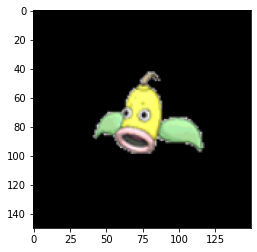